In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, datetime

import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from math import sqrt 

In [2]:
def get_temp_data():
    '''
    This function is to acquire the people data from the api and check if there is a local csv, if not then it makes one
    '''
    
    if os.path.isfile('GlobalLandTemperaturesByCountry.csv'):
        
        return pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
df = get_temp_data()
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [4]:
df['Country'].value_counts()

Åland                                  3239
Faroe Islands                          3239
Greece                                 3239
Germany                                3239
Saint Pierre And Miquelon              3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [5]:
colombia_df = df[df['Country'].str.contains('Col') == True]
colombia_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
114732  1824-01-01              25.010                          0.888   
114733  1824-02-01              24.709                          1.802   
114734  1824-03-01              25.060                          1.100   
114735  1824-04-01              24.688                          1.592   
114736  1824-05-01              24.284                          1.177   
...            ...                 ...                            ...   
117004  2013-05-01              25.370                          0.288   
117005  2013-06-01              25.500                          0.321   
117006  2013-07-01              25.276                          0.265   
117007  2013-08-01              25.390                          0.313   
117008  2013-09-01                 NaN                            NaN   

         Country  
114732  Colombia  
114733  Colombia  
114734  Colombia  
114735  Colombia  
114736  Colombia  
...          ...  
117004  Colombia  
117005  Colombia  
117006  Colombia  
117007  Colombia  
117008  Colombia  

[2277 rows x 4 columns]

In [6]:
colombia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 114732 to 117008
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2277 non-null   object 
 1   AverageTemperature             2077 non-null   float64
 2   AverageTemperatureUncertainty  2077 non-null   float64
 3   Country                        2277 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.9+ KB


In [7]:
colombia_df.describe().T

count       mean       std     min     25%  \
AverageTemperature             2077.0  24.716871  0.629906  22.918  24.279   
AverageTemperatureUncertainty  2077.0   0.581472  0.397597   0.076   0.268   

                                  50%     75%     max  
AverageTemperature             24.692  25.114  27.205  
AverageTemperatureUncertainty   0.433   0.840   3.363

## Prepare

In [8]:
colombia_df.isna().sum()

dt                                 0
AverageTemperature               200
AverageTemperatureUncertainty    200
Country                            0
dtype: int64

In [9]:
# colombia_df.fillna(0, inplace = True)

In [10]:
pd.options.display.max_rows = None
colombia_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
114732  1824-01-01              25.010                          0.888   
114733  1824-02-01              24.709                          1.802   
114734  1824-03-01              25.060                          1.100   
114735  1824-04-01              24.688                          1.592   
114736  1824-05-01              24.284                          1.177   
114737  1824-06-01                 NaN                            NaN   
114738  1824-07-01              24.975                          2.395   
114739  1824-08-01              24.281                          1.354   
114740  1824-09-01              24.222                          1.357   
114741  1824-10-01              23.510                          1.017   
114742  1824-11-01              24.601                          1.285   
114743  1824-12-01              26.012                          1.855   
114744  1825-01-01              25.583                          1.736   
114745  1825-02-01              25.162                          1.233   
114746  1825-03-01              25.309                          1.594   
114747  1825-04-01              25.533                          1.746   
114748  1825-05-01              24.316                          1.062   
114749  1825-06-01              24.846                          0.872   
114750  1825-07-01              24.431                          1.871   
114751  1825-08-01              24.244                          1.746   
114752  1825-09-01              23.806                          1.403   
114753  1825-10-01              23.436                          1.304   
114754  1825-11-01              25.069                          1.403   
114755  1825-12-01              24.487                          1.048   
114756  1826-01-01                 NaN                            NaN   
114757  1826-02-01              23.760                          1.174   
114758  1826-03-01              24.843                          1.345   
114759  1826-04-01              24.690                          1.870   
114760  1826-05-01              25.104                          1.097   
114761  1826-06-01                 NaN                            NaN   
114762  1826-07-01              24.677                          0.950   
114763  1826-08-01              23.932                          1.064   
114764  1826-09-01              23.791                          1.657   
114765  1826-10-01              23.766                          1.674   
114766  1826-11-01              25.194                          0.873   
114767  1826-12-01              25.979                          1.819   
114768  1827-01-01              26.168                          2.027   
114769  1827-02-01              25.775                          1.008   
114770  1827-03-01              25.874                          1.427   
114771  1827-04-01              25.664                          2.246   
114772  1827-05-01              25.028                          1.703   
114773  1827-06-01                 NaN                            NaN   
114774  1827-07-01              24.889                          1.034   
114775  1827-08-01              24.497                          1.092   
114776  1827-09-01              23.604                          0.885   
114777  1827-10-01              23.725                          0.933   
114778  1827-11-01              25.076                          0.943   
114779  1827-12-01              24.171                          1.929   
114780  1828-01-01              23.381                          1.423   
114781  1828-02-01              23.988                          1.623   
114782  1828-03-01              25.288                          1.435   
114783  1828-04-01              24.755                          1.430   
114784  1828-05-01              24.555                          1.800   
114785  1828-06-01              24.996                          1.677   
1

In [11]:
colombia_df.columns = colombia_df.columns.str.lower()

colombia_df = colombia_df.rename(columns = {'dt':'date',
                                            'averagetemperature':'avg_temp',
                                            'averagetemperatureuncertainty':'avg_temp_uncertainty'})

In [12]:
start_date = '1846-01-01'
end_date = '2013-08-01'
mask = (colombia_df['date'] >= start_date) & (colombia_df['date'] <= end_date)
colombia_df = colombia_df.loc[mask]

In [13]:
colombia_df

date  avg_temp  avg_temp_uncertainty   country
114996  1846-01-01    25.977                 1.314  Colombia
114997  1846-02-01    25.614                 1.100  Colombia
114998  1846-03-01    26.131                 1.174  Colombia
114999  1846-04-01    23.857                 1.139  Colombia
115000  1846-05-01    24.321                 1.328  Colombia
115001  1846-06-01    24.749                 1.218  Colombia
115002  1846-07-01    25.084                 1.432  Colombia
115003  1846-08-01    24.838                 1.077  Colombia
115004  1846-09-01    24.309                 1.188  Colombia
115005  1846-10-01    23.577                 0.869  Colombia
115006  1846-11-01    23.932                 1.269  Colombia
115007  1846-12-01    24.817                 0.918  Colombia
115008  1847-01-01    25.184                 3.363  Colombia
115009  1847-02-01    25.280                 0.944  Colombia
115010  1847-03-01    23.852                 1.615  Colombia
115011  1847-04-01    24.139                 0.990  Colombia
115012  1847-05-01    23.593                 0.952  Colombia
115013  1847-06-01    23.832                 1.247  Colombia
115014  1847-07-01    24.485                 1.136  Colombia
115015  1847-08-01    24.336                 0.964  Colombia
115016  1847-09-01    24.232                 0.847  Colombia
115017  1847-10-01    23.848                 0.850  Colombia
115018  1847-11-01    24.398                 0.836  Colombia
115019  1847-12-01    22.992                 1.420  Colombia
115020  1848-01-01    23.299                 1.212  Colombia
115021  1848-02-01    25.650                 1.039  Colombia
115022  1848-03-01    24.474                 0.888  Colombia
115023  1848-04-01    24.281                 0.954  Colombia
115024  1848-05-01    23.613                 1.130  Colombia
115025  1848-06-01    23.888                 1.367  Colombia
115026  1848-07-01    24.513                 1.449  Colombia
115027  1848-08-01    24.045                 1.163  Colombia
115028  1848-09-01    23.766                 1.071  Colombia
115029  1848-10-01    24.011                 0.879  Colombia
115030  1848-11-01    23.882                 0.820  Colombia
115031  1848-12-01    23.823                 1.168  Colombia
115032  1849-01-01    24.937                 0.962  Colombia
115033  1849-02-01    24.923                 1.021  Colombia
115034  1849-03-01    25.371                 1.344  Colombia
115035  1849-04-01    23.467                 1.161  Colombia
115036  1849-05-01    23.467                 0.788  Colombia
115037  1849-06-01    23.934                 1.178  Colombia
115038  1849-07-01    24.382                 0.982  Colombia
115039  1849-08-01    24.350                 0.983  Colombia
115040  1849-09-01    23.894                 0.931  Colombia
115041  1849-10-01    24.325                 1.081  Colombia
115042  1849-11-01    24.422                 1.200  Colombia
115043  1849-12-01    23.227                 0.970  Colombia
115044  1850-01-01    23.614                 1.032  Colombia
115045  1850-02-01    25.360                 1.051  Colombia
115046  1850-03-01    25.053                 1.901  Colombia
115047  1850-04-01    23.895                 1.410  Colombia
115048  1850-05-01    23.270                 0.876  Colombia
115049  1850-06-01    23.902                 0.909  Colombia
115050  1850-07-01    24.461                 0.904  Colombia
115051  1850-08-01    24.606                 0.946  Colombia
115052  1850-09-01    24.324                 0.907  Colombia
115053  1850-10-01    23.631                 0.926  Colombia
115054  1850-11-01    23.618                 1.229  Colombia
115055  1850-12-01    23.952                 1.073  Colombia
115056  1851-01-01    24.969                 0.875  Colombia
115057  1851-02-01    24.864                 0.862  Colombia
115058  1851-03-01    24.162                 0.972  Colombia
115059  1851-04-01    23.807                 1.156  Colombia
115060  1851-05-01    24.242                 0.97

In [14]:
colombia_df.shape

(2012, 4)

In [15]:
colombia_df['date'] = pd.to_datetime(colombia_df['date'])
colombia_df.dtypes

date                    datetime64[ns]
avg_temp                       float64
avg_temp_uncertainty           float64
country                         object
dtype: object

In [16]:
colombia_df.set_index('date', inplace = True)

In [17]:
colombia_df

avg_temp  avg_temp_uncertainty   country
date                                                
1846-01-01    25.977                 1.314  Colombia
1846-02-01    25.614                 1.100  Colombia
1846-03-01    26.131                 1.174  Colombia
1846-04-01    23.857                 1.139  Colombia
1846-05-01    24.321                 1.328  Colombia
1846-06-01    24.749                 1.218  Colombia
1846-07-01    25.084                 1.432  Colombia
1846-08-01    24.838                 1.077  Colombia
1846-09-01    24.309                 1.188  Colombia
1846-10-01    23.577                 0.869  Colombia
1846-11-01    23.932                 1.269  Colombia
1846-12-01    24.817                 0.918  Colombia
1847-01-01    25.184                 3.363  Colombia
1847-02-01    25.280                 0.944  Colombia
1847-03-01    23.852                 1.615  Colombia
1847-04-01    24.139                 0.990  Colombia
1847-05-01    23.593                 0.952  Colombia
1847-06-01    23.832                 1.247  Colombia
1847-07-01    24.485                 1.136  Colombia
1847-08-01    24.336                 0.964  Colombia
1847-09-01    24.232                 0.847  Colombia
1847-10-01    23.848                 0.850  Colombia
1847-11-01    24.398                 0.836  Colombia
1847-12-01    22.992                 1.420  Colombia
1848-01-01    23.299                 1.212  Colombia
1848-02-01    25.650                 1.039  Colombia
1848-03-01    24.474                 0.888  Colombia
1848-04-01    24.281                 0.954  Colombia
1848-05-01    23.613                 1.130  Colombia
1848-06-01    23.888                 1.367  Colombia
1848-07-01    24.513                 1.449  Colombia
1848-08-01    24.045                 1.163  Colombia
1848-09-01    23.766                 1.071  Colombia
1848-10-01    24.011                 0.879  Colombia
1848-11-01    23.882                 0.820  Colombia
1848-12-01    23.823                 1.168  Colombia
1849-01-01    24.937                 0.962  Colombia
1849-02-01    24.923                 1.021  Colombia
1849-03-01    25.371                 1.344  Colombia
1849-04-01    23.467                 1.161  Colombia
1849-05-01    23.467                 0.788  Colombia
1849-06-01    23.934                 1.178  Colombia
1849-07-01    24.382                 0.982  Colombia
1849-08-01    24.350                 0.983  Colombia
1849-09-01    23.894                 0.931  Colombia
1849-10-01    24.325                 1.081  Colombia
1849-11-01    24.422                 1.200  Colombia
1849-12-01    23.227                 0.970  Colombia
1850-01-01    23.614                 1.032  Colombia
1850-02-01    25.360                 1.051  Colombia
1850-03-01    25.053                 1.901  Colombia
1850-04-01    23.895                 1.410  Colombia
1850-05-01    23.270                 0.876  Colombia
1850-06-01    23.902                 0.909  Colombia
1850-07-01    24.461                 0.904  Colombia
1850-08-01    24.606                 0.946  Colombia
1850-09-01    24.324                 0.907  Colombia
1850-10-01    23.631                 0.926  Colombia
1850-11-01    23.618                 1.229  Colombia
1850-12-01    23.952                 1.073  Colombia
1851-01-01    24.969                 0.875  Colombia
1851-02-01    24.864                 0.862  Colombia
1851-03-01    24.162                 0.972  Colombia
1851-04-01    23.807                 1.156  Colombia
1851-05-01    24.242                 0.978  Colombia
1851-06-01    24.026                 1.045  Colombia
1851-07-01    24.693                 1.247  Colombia
1851-08-01    24.504                 1.150  Colombia
1851-09-01    24.385                 0.927  Colombia
1851-10-01    24.326                 1.552  Colombia
1851-11-01    23.671                 0.976  Colombia
1851-12-01    24.405                 2.189  Colombia
1852-01-01    24.640                 1.670  Colombia
1852-02-01    24.456                 

In [18]:
len(colombia_df.index)

2012

In [19]:
colombia_resampled = colombia_df.resample('m').mean()
colombia_resampled

avg_temp  avg_temp_uncertainty
date                                      
1846-01-31    25.977                 1.314
1846-02-28    25.614                 1.100
1846-03-31    26.131                 1.174
1846-04-30    23.857                 1.139
1846-05-31    24.321                 1.328
1846-06-30    24.749                 1.218
1846-07-31    25.084                 1.432
1846-08-31    24.838                 1.077
1846-09-30    24.309                 1.188
1846-10-31    23.577                 0.869
1846-11-30    23.932                 1.269
1846-12-31    24.817                 0.918
1847-01-31    25.184                 3.363
1847-02-28    25.280                 0.944
1847-03-31    23.852                 1.615
1847-04-30    24.139                 0.990
1847-05-31    23.593                 0.952
1847-06-30    23.832                 1.247
1847-07-31    24.485                 1.136
1847-08-31    24.336                 0.964
1847-09-30    24.232                 0.847
1847-10-31    23.848                 0.850
1847-11-30    24.398                 0.836
1847-12-31    22.992                 1.420
1848-01-31    23.299                 1.212
1848-02-29    25.650                 1.039
1848-03-31    24.474                 0.888
1848-04-30    24.281                 0.954
1848-05-31    23.613                 1.130
1848-06-30    23.888                 1.367
1848-07-31    24.513                 1.449
1848-08-31    24.045                 1.163
1848-09-30    23.766                 1.071
1848-10-31    24.011                 0.879
1848-11-30    23.882                 0.820
1848-12-31    23.823                 1.168
1849-01-31    24.937                 0.962
1849-02-28    24.923                 1.021
1849-03-31    25.371                 1.344
1849-04-30    23.467                 1.161
1849-05-31    23.467                 0.788
1849-06-30    23.934                 1.178
1849-07-31    24.382                 0.982
1849-08-31    24.350                 0.983
1849-09-30    23.894                 0.931
1849-10-31    24.325                 1.081
1849-11-30    24.422                 1.200
1849-12-31    23.227                 0.970
1850-01-31    23.614                 1.032
1850-02-28    25.360                 1.051
1850-03-31    25.053                 1.901
1850-04-30    23.895                 1.410
1850-05-31    23.270                 0.876
1850-06-30    23.902                 0.909
1850-07-31    24.461                 0.904
1850-08-31    24.606                 0.946
1850-09-30    24.324                 0.907
1850-10-31    23.631                 0.926
1850-11-30    23.618                 1.229
1850-12-31    23.952                 1.073
1851-01-31    24.969                 0.875
1851-02-28    24.864                 0.862
1851-03-31    24.162                 0.972
1851-04-30    23.807                 1.156
1851-05-31    24.242                 0.978
1851-06-30    24.026                 1.045
1851-07-31    24.693                 1.247
1851-08-31    24.504                 1.150
1851-09-30    24.385                 0.927
1851-10-31    24.326                 1.552
1851-11-30    23.671                 0.976
1851-12-31    24.405                 2.189
1852-01-31    24.640                 1.670
1852-02-29    24.456                 1.042
1852-03-31    23.661                 0.950
1852-04-30    24.019                 1.218
1852-05-31    24.358                 0.973
1852-06-30    24.116                 0.837
1852-07-31    24.436                 1.060
1852-08-31    24.236                 0.927
1852-09-30    24.344                 1.021
1852-10-31    23.866                 1.116
1852-11-30    23.394                 1.143
1852-12-31    24.269                 1.245
1853-01-31    24.377                 0.998
1853-02-28    23.793                 1.028
1853-03-31    24.407                 1.204
1853-04-30    24.095                 0.965
1853-05-31    24.191                 0.813
1853-06-30    24.447                 1.170
1853-07-31    24.553                 0.775
1853-08-31   

In [20]:
colombia_resampled.index[-1] - colombia_resampled.index[0]

Timedelta('61208 days 00:00:00')

In [21]:
colombia_df

avg_temp  avg_temp_uncertainty   country
date                                                
1846-01-01    25.977                 1.314  Colombia
1846-02-01    25.614                 1.100  Colombia
1846-03-01    26.131                 1.174  Colombia
1846-04-01    23.857                 1.139  Colombia
1846-05-01    24.321                 1.328  Colombia
1846-06-01    24.749                 1.218  Colombia
1846-07-01    25.084                 1.432  Colombia
1846-08-01    24.838                 1.077  Colombia
1846-09-01    24.309                 1.188  Colombia
1846-10-01    23.577                 0.869  Colombia
1846-11-01    23.932                 1.269  Colombia
1846-12-01    24.817                 0.918  Colombia
1847-01-01    25.184                 3.363  Colombia
1847-02-01    25.280                 0.944  Colombia
1847-03-01    23.852                 1.615  Colombia
1847-04-01    24.139                 0.990  Colombia
1847-05-01    23.593                 0.952  Colombia
1847-06-01    23.832                 1.247  Colombia
1847-07-01    24.485                 1.136  Colombia
1847-08-01    24.336                 0.964  Colombia
1847-09-01    24.232                 0.847  Colombia
1847-10-01    23.848                 0.850  Colombia
1847-11-01    24.398                 0.836  Colombia
1847-12-01    22.992                 1.420  Colombia
1848-01-01    23.299                 1.212  Colombia
1848-02-01    25.650                 1.039  Colombia
1848-03-01    24.474                 0.888  Colombia
1848-04-01    24.281                 0.954  Colombia
1848-05-01    23.613                 1.130  Colombia
1848-06-01    23.888                 1.367  Colombia
1848-07-01    24.513                 1.449  Colombia
1848-08-01    24.045                 1.163  Colombia
1848-09-01    23.766                 1.071  Colombia
1848-10-01    24.011                 0.879  Colombia
1848-11-01    23.882                 0.820  Colombia
1848-12-01    23.823                 1.168  Colombia
1849-01-01    24.937                 0.962  Colombia
1849-02-01    24.923                 1.021  Colombia
1849-03-01    25.371                 1.344  Colombia
1849-04-01    23.467                 1.161  Colombia
1849-05-01    23.467                 0.788  Colombia
1849-06-01    23.934                 1.178  Colombia
1849-07-01    24.382                 0.982  Colombia
1849-08-01    24.350                 0.983  Colombia
1849-09-01    23.894                 0.931  Colombia
1849-10-01    24.325                 1.081  Colombia
1849-11-01    24.422                 1.200  Colombia
1849-12-01    23.227                 0.970  Colombia
1850-01-01    23.614                 1.032  Colombia
1850-02-01    25.360                 1.051  Colombia
1850-03-01    25.053                 1.901  Colombia
1850-04-01    23.895                 1.410  Colombia
1850-05-01    23.270                 0.876  Colombia
1850-06-01    23.902                 0.909  Colombia
1850-07-01    24.461                 0.904  Colombia
1850-08-01    24.606                 0.946  Colombia
1850-09-01    24.324                 0.907  Colombia
1850-10-01    23.631                 0.926  Colombia
1850-11-01    23.618                 1.229  Colombia
1850-12-01    23.952                 1.073  Colombia
1851-01-01    24.969                 0.875  Colombia
1851-02-01    24.864                 0.862  Colombia
1851-03-01    24.162                 0.972  Colombia
1851-04-01    23.807                 1.156  Colombia
1851-05-01    24.242                 0.978  Colombia
1851-06-01    24.026                 1.045  Colombia
1851-07-01    24.693                 1.247  Colombia
1851-08-01    24.504                 1.150  Colombia
1851-09-01    24.385                 0.927  Colombia
1851-10-01    24.326                 1.552  Colombia
1851-11-01    23.671                 0.976  Colombia
1851-12-01    24.405                 2.189  Colombia
1852-01-01    24.640                 1.670  Colombia
1852-02-01    24.456                 

In [22]:
def clean_df(df):
    colombia_df = df[df['Country'].str.contains('Col') == True]
    colombia_df.columns = colombia_df.columns.str.lower()

    colombia_df = colombia_df.rename(columns = {'dt':'date',
                                                'averagetemperature':'avg_temp',
                                                'averagetemperatureuncertainty':'avg_temp_uncertainty'})

    start_date = '1846-01-01'
    end_date = '2013-08-01'
    mask = (colombia_df['date'] >= start_date) & (colombia_df['date'] <= end_date)
    colombia_df = colombia_df.loc[mask]
    
    colombia_df['date'] = pd.to_datetime(colombia_df['date'])
    colombia_df.set_index('date', inplace = True)
    
    colombia_resampled = colombia_df.resample('m').mean()
    
    return colombia_df, colombia_resampled

## Explore

In [23]:
colombia_df.shape

(2012, 3)

In [24]:
colombia_resampled.shape

(2012, 2)

In [25]:
train_size = int(round(colombia_resampled.shape[0] * 0.7)) + 1
validate_size = int(round(colombia_resampled.shape[0] * 0.2))
test_size = int(round(colombia_resampled.shape[0] * 0.1))
train_size, validate_size, test_size

(1409, 402, 201)

In [26]:
len(colombia_resampled) == train_size + validate_size + test_size

True

In [27]:
train_size + validate_size + test_size

2012

In [28]:
validate_end_index = train_size + validate_size
validate_end_index

1811

In [29]:
train = colombia_resampled[:train_size]
train

avg_temp  avg_temp_uncertainty
date                                      
1846-01-31    25.977                 1.314
1846-02-28    25.614                 1.100
1846-03-31    26.131                 1.174
1846-04-30    23.857                 1.139
1846-05-31    24.321                 1.328
1846-06-30    24.749                 1.218
1846-07-31    25.084                 1.432
1846-08-31    24.838                 1.077
1846-09-30    24.309                 1.188
1846-10-31    23.577                 0.869
1846-11-30    23.932                 1.269
1846-12-31    24.817                 0.918
1847-01-31    25.184                 3.363
1847-02-28    25.280                 0.944
1847-03-31    23.852                 1.615
1847-04-30    24.139                 0.990
1847-05-31    23.593                 0.952
1847-06-30    23.832                 1.247
1847-07-31    24.485                 1.136
1847-08-31    24.336                 0.964
1847-09-30    24.232                 0.847
1847-10-31    23.848                 0.850
1847-11-30    24.398                 0.836
1847-12-31    22.992                 1.420
1848-01-31    23.299                 1.212
1848-02-29    25.650                 1.039
1848-03-31    24.474                 0.888
1848-04-30    24.281                 0.954
1848-05-31    23.613                 1.130
1848-06-30    23.888                 1.367
1848-07-31    24.513                 1.449
1848-08-31    24.045                 1.163
1848-09-30    23.766                 1.071
1848-10-31    24.011                 0.879
1848-11-30    23.882                 0.820
1848-12-31    23.823                 1.168
1849-01-31    24.937                 0.962
1849-02-28    24.923                 1.021
1849-03-31    25.371                 1.344
1849-04-30    23.467                 1.161
1849-05-31    23.467                 0.788
1849-06-30    23.934                 1.178
1849-07-31    24.382                 0.982
1849-08-31    24.350                 0.983
1849-09-30    23.894                 0.931
1849-10-31    24.325                 1.081
1849-11-30    24.422                 1.200
1849-12-31    23.227                 0.970
1850-01-31    23.614                 1.032
1850-02-28    25.360                 1.051
1850-03-31    25.053                 1.901
1850-04-30    23.895                 1.410
1850-05-31    23.270                 0.876
1850-06-30    23.902                 0.909
1850-07-31    24.461                 0.904
1850-08-31    24.606                 0.946
1850-09-30    24.324                 0.907
1850-10-31    23.631                 0.926
1850-11-30    23.618                 1.229
1850-12-31    23.952                 1.073
1851-01-31    24.969                 0.875
1851-02-28    24.864                 0.862
1851-03-31    24.162                 0.972
1851-04-30    23.807                 1.156
1851-05-31    24.242                 0.978
1851-06-30    24.026                 1.045
1851-07-31    24.693                 1.247
1851-08-31    24.504                 1.150
1851-09-30    24.385                 0.927
1851-10-31    24.326                 1.552
1851-11-30    23.671                 0.976
1851-12-31    24.405                 2.189
1852-01-31    24.640                 1.670
1852-02-29    24.456                 1.042
1852-03-31    23.661                 0.950
1852-04-30    24.019                 1.218
1852-05-31    24.358                 0.973
1852-06-30    24.116                 0.837
1852-07-31    24.436                 1.060
1852-08-31    24.236                 0.927
1852-09-30    24.344                 1.021
1852-10-31    23.866                 1.116
1852-11-30    23.394                 1.143
1852-12-31    24.269                 1.245
1853-01-31    24.377                 0.998
1853-02-28    23.793                 1.028
1853-03-31    24.407                 1.204
1853-04-30    24.095                 0.965
1853-05-31    24.191                 0.813
1853-06-30    24.447                 1.170
1853-07-31    24.553                 0.775
1853-08-31   

In [30]:
validate = colombia_resampled[train_size:validate_end_index]
validate

avg_temp  avg_temp_uncertainty
date                                      
1963-06-30    24.657                 0.265
1963-07-31    24.582                 0.321
1963-08-31    25.283                 0.169
1963-09-30    25.594                 0.364
1963-10-31    25.229                 0.238
1963-11-30    24.822                 0.368
1963-12-31    25.418                 0.192
1964-01-31    25.927                 0.256
1964-02-29    26.279                 0.303
1964-03-31    26.011                 0.216
1964-04-30    24.794                 0.231
1964-05-31    25.000                 0.242
1964-06-30    24.203                 0.348
1964-07-31    24.241                 0.280
1964-08-31    24.713                 0.261
1964-09-30    24.847                 0.220
1964-10-31    24.585                 0.452
1964-11-30    24.777                 0.295
1964-12-31    24.373                 0.120
1965-01-31    24.909                 0.198
1965-02-28    25.548                 0.203
1965-03-31    25.716                 0.424
1965-04-30    24.670                 0.180
1965-05-31    24.646                 0.345
1965-06-30    24.613                 0.435
1965-07-31    24.913                 0.236
1965-08-31    25.004                 0.108
1965-09-30    25.408                 0.328
1965-10-31    25.253                 0.343
1965-11-30    24.855                 0.248
1965-12-31    25.103                 0.276
1966-01-31    25.817                 0.304
1966-02-28    26.290                 0.233
1966-03-31    25.783                 0.338
1966-04-30    25.429                 0.163
1966-05-31    25.071                 0.155
1966-06-30    24.835                 0.230
1966-07-31    24.741                 0.255
1966-08-31    25.046                 0.258
1966-09-30    25.138                 0.300
1966-10-31    24.931                 0.236
1966-11-30    24.739                 0.188
1966-12-31    24.653                 0.140
1967-01-31    24.919                 0.247
1967-02-28    25.251                 0.255
1967-03-31    25.314                 0.206
1967-04-30    24.612                 0.205
1967-05-31    24.785                 0.268
1967-06-30    24.174                 0.219
1967-07-31    24.542                 0.472
1967-08-31    25.073                 0.500
1967-09-30    25.152                 0.317
1967-10-31    24.522                 0.184
1967-11-30    24.955                 0.277
1967-12-31    24.832                 0.209
1968-01-31    25.126                 0.364
1968-02-29    25.533                 0.204
1968-03-31    25.314                 0.304
1968-04-30    24.660                 0.196
1968-05-31    24.418                 0.266
1968-06-30    24.030                 0.522
1968-07-31    24.387                 0.202
1968-08-31    24.882                 0.189
1968-09-30    24.853                 0.170
1968-10-31    24.592                 0.278
1968-11-30    24.869                 0.187
1968-12-31    25.114                 0.272
1969-01-31    25.056                 0.318
1969-02-28    25.477                 0.379
1969-03-31    25.988                 0.309
1969-04-30    25.197                 0.268
1969-05-31    25.335                 0.293
1969-06-30    24.991                 0.373
1969-07-31    24.951                 0.301
1969-08-31    24.955                 0.320
1969-09-30    25.396                 0.142
1969-10-31    24.514                 0.177
1969-11-30    25.189                 0.148
1969-12-31    25.124                 0.313
1970-01-31    25.220                 0.263
1970-02-28    25.487                 0.313
1970-03-31    25.513                 0.359
1970-04-30    25.040                 0.251
1970-05-31    24.802                 0.162
1970-06-30    24.614                 0.268
1970-07-31    24.586                 0.209
1970-08-31    24.828                 0.171
1970-09-30    24.549                 0.267
1970-10-31    24.825                 0.214
1970-11-30    24.849                 0.105
1970-12-31    24.862                 0.081
1971-01-31   

In [31]:
test = colombia_resampled[validate_end_index:]
test

avg_temp  avg_temp_uncertainty
date                                      
1996-12-31    24.923                 0.099
1997-01-31    25.125                 0.316
1997-02-28    25.397                 0.305
1997-03-31    25.870                 0.432
1997-04-30    25.491                 0.173
1997-05-31    25.390                 0.183
1997-06-30    25.263                 0.285
1997-07-31    25.240                 0.280
1997-08-31    25.735                 0.192
1997-09-30    25.923                 0.392
1997-10-31    25.880                 0.279
1997-11-30    25.567                 0.118
1997-12-31    26.079                 0.247
1998-01-31    26.911                 0.316
1998-02-28    27.205                 0.309
1998-03-31    26.895                 0.350
1998-04-30    26.261                 0.344
1998-05-31    25.754                 0.211
1998-06-30    25.169                 0.207
1998-07-31    25.117                 0.190
1998-08-31    25.656                 0.149
1998-09-30    25.689                 0.131
1998-10-31    25.521                 0.143
1998-11-30    25.256                 0.196
1998-12-31    25.116                 0.169
1999-01-31    25.043                 0.250
1999-02-28    24.806                 0.294
1999-03-31    25.445                 0.195
1999-04-30    24.745                 0.265
1999-05-31    25.010                 0.144
1999-06-30    24.714                 0.181
1999-07-31    24.697                 0.240
1999-08-31    24.842                 0.339
1999-09-30    24.728                 0.331
1999-10-31    24.467                 0.288
1999-11-30    25.091                 0.170
1999-12-31    24.860                 0.093
2000-01-31    24.802                 0.377
2000-02-29    25.085                 0.385
2000-03-31    25.252                 0.278
2000-04-30    25.029                 0.120
2000-05-31    24.878                 0.282
2000-06-30    24.891                 0.278
2000-07-31    24.813                 0.210
2000-08-31    25.240                 0.259
2000-09-30    24.900                 0.198
2000-10-31    25.151                 0.189
2000-11-30    25.324                 0.159
2000-12-31    24.997                 0.253
2001-01-31    25.123                 0.295
2001-02-28    25.772                 0.541
2001-03-31    25.801                 0.350
2001-04-30    25.589                 0.215
2001-05-31    25.317                 0.230
2001-06-30    24.655                 0.214
2001-07-31    25.096                 0.309
2001-08-31    25.617                 0.349
2001-09-30    25.341                 0.219
2001-10-31    25.607                 0.210
2001-11-30    25.565                 0.220
2001-12-31    25.460                 0.281
2002-01-31    25.867                 0.305
2002-02-28    26.385                 0.520
2002-03-31    26.013                 0.201
2002-04-30    25.193                 0.154
2002-05-31    25.485                 0.320
2002-06-30    24.820                 0.139
2002-07-31    25.308                 0.383
2002-08-31    25.648                 0.261
2002-09-30    25.816                 0.076
2002-10-31    25.297                 0.273
2002-11-30    25.340                 0.218
2002-12-31    25.677                 0.286
2003-01-31    26.449                 0.289
2003-02-28    26.771                 0.465
2003-03-31    26.326                 0.225
2003-04-30    25.639                 0.292
2003-05-31    25.537                 0.198
2003-06-30    24.884                 0.372
2003-07-31    25.022                 0.213
2003-08-31    25.573                 0.462
2003-09-30    25.533                 0.164
2003-10-31    25.276                 0.253
2003-11-30    25.382                 0.285
2003-12-31    25.472                 0.249
2004-01-31    25.820                 0.226
2004-02-29    26.390                 0.315
2004-03-31    26.556                 0.222
2004-04-30    25.476                 0.267
2004-05-31    25.245                 0.221
2004-06-30    25.056                 0.275
2004-07-31   

In [32]:
train.shape[0], validate.shape[0], test.shape[0]

(1409, 402, 201)

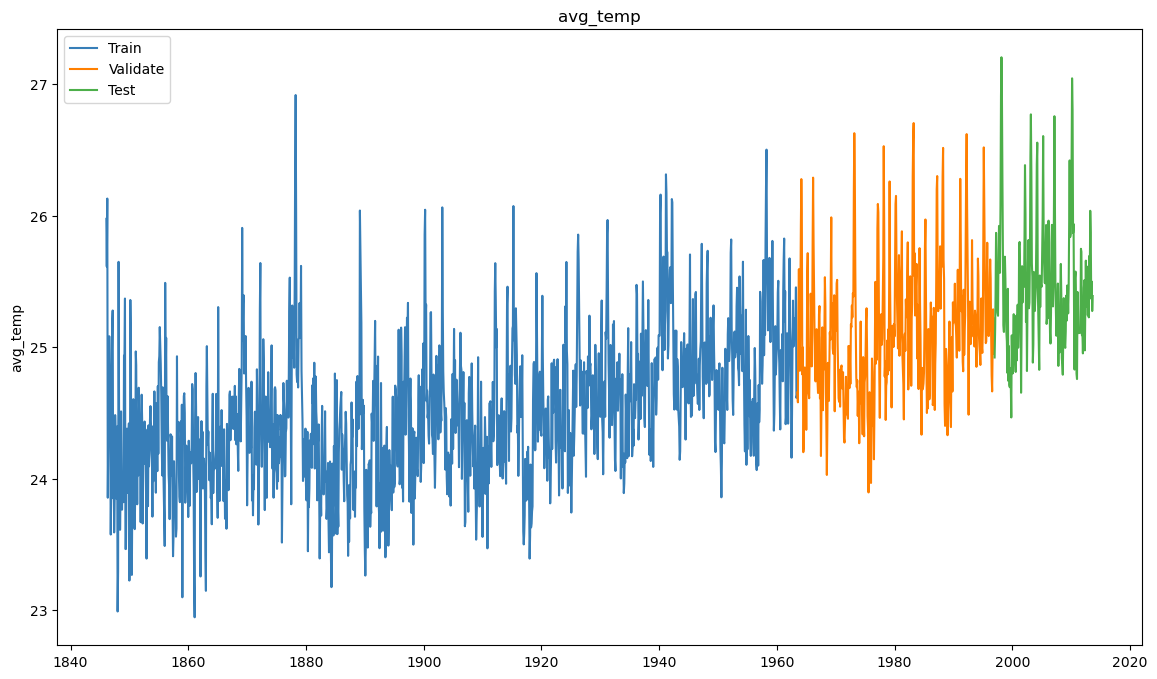

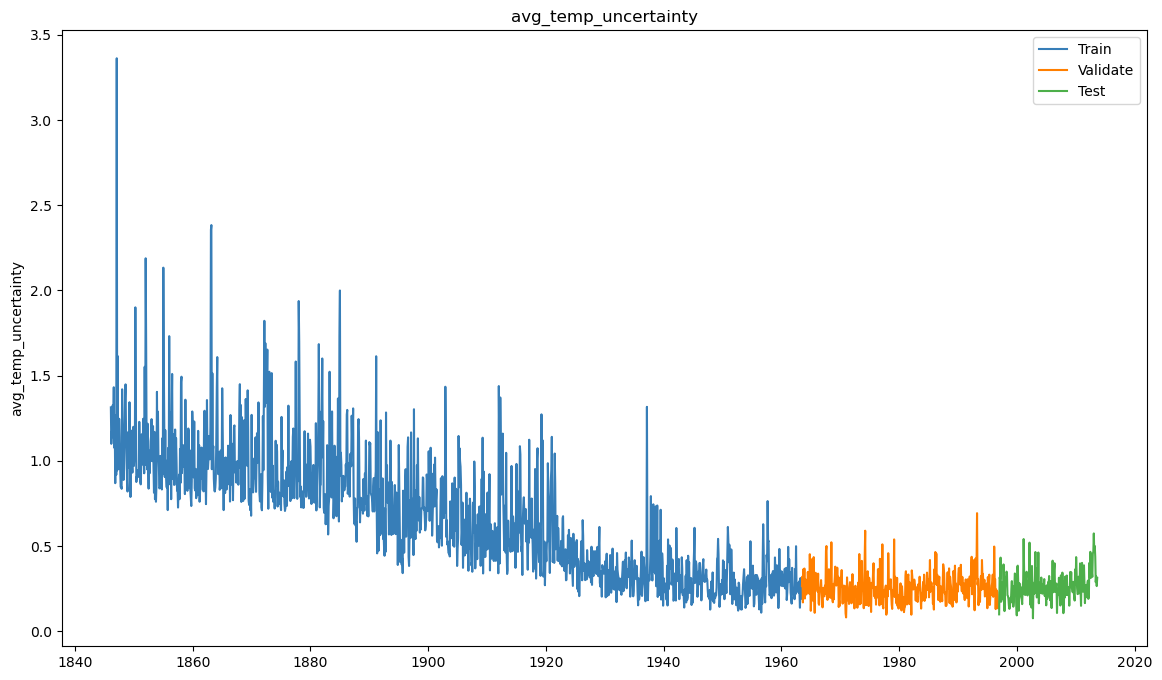

In [33]:

for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col], color='#377eb8', label = 'Train')
    plt.plot(validate[col], color='#ff7f00', label = 'Validate')
    plt.plot(test[col], color='#4daf4a', label = 'Test')
    plt.legend()
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [34]:
train['month'] = train.index.month_name()
train

avg_temp  avg_temp_uncertainty      month
date                                                 
1846-01-31    25.977                 1.314    January
1846-02-28    25.614                 1.100   February
1846-03-31    26.131                 1.174      March
1846-04-30    23.857                 1.139      April
1846-05-31    24.321                 1.328        May
1846-06-30    24.749                 1.218       June
1846-07-31    25.084                 1.432       July
1846-08-31    24.838                 1.077     August
1846-09-30    24.309                 1.188  September
1846-10-31    23.577                 0.869    October
1846-11-30    23.932                 1.269   November
1846-12-31    24.817                 0.918   December
1847-01-31    25.184                 3.363    January
1847-02-28    25.280                 0.944   February
1847-03-31    23.852                 1.615      March
1847-04-30    24.139                 0.990      April
1847-05-31    23.593                 0.952        May
1847-06-30    23.832                 1.247       June
1847-07-31    24.485                 1.136       July
1847-08-31    24.336                 0.964     August
1847-09-30    24.232                 0.847  September
1847-10-31    23.848                 0.850    October
1847-11-30    24.398                 0.836   November
1847-12-31    22.992                 1.420   December
1848-01-31    23.299                 1.212    January
1848-02-29    25.650                 1.039   February
1848-03-31    24.474                 0.888      March
1848-04-30    24.281                 0.954      April
1848-05-31    23.613                 1.130        May
1848-06-30    23.888                 1.367       June
1848-07-31    24.513                 1.449       July
1848-08-31    24.045                 1.163     August
1848-09-30    23.766                 1.071  September
1848-10-31    24.011                 0.879    October
1848-11-30    23.882                 0.820   November
1848-12-31    23.823                 1.168   December
1849-01-31    24.937                 0.962    January
1849-02-28    24.923                 1.021   February
1849-03-31    25.371                 1.344      March
1849-04-30    23.467                 1.161      April
1849-05-31    23.467                 0.788        May
1849-06-30    23.934                 1.178       June
1849-07-31    24.382                 0.982       July
1849-08-31    24.350                 0.983     August
1849-09-30    23.894                 0.931  September
1849-10-31    24.325                 1.081    October
1849-11-30    24.422                 1.200   November
1849-12-31    23.227                 0.970   December
1850-01-31    23.614                 1.032    January
1850-02-28    25.360                 1.051   February
1850-03-31    25.053                 1.901      March
1850-04-30    23.895                 1.410      April
1850-05-31    23.270                 0.876        May
1850-06-30    23.902                 0.909       June
1850-07-31    24.461                 0.904       July
1850-08-31    24.606                 0.946     August
1850-09-30    24.324                 0.907  September
1850-10-31    23.631                 0.926    October
1850-11-30    23.618                 1.229   November
1850-12-31    23.952                 1.073   December
1851-01-31    24.969                 0.875    January
1851-02-28    24.864                 0.862   February
1851-03-31    24.162                 0.972      March
1851-04-30    23.807                 1.156      April
1851-05-31    24.242                 0.978        May
1851-06-30    24.026                 1.045       June
1851-07-31    24.693                 1.247       July
1851-08-31    24.504                 1.150     August
1851-09-30    24.385                 0.927  September
1851-10-31    24.326                 1.552    October
1851-11-30    23.671                 0.976   November
1851-12-31    24.405                 2.189   December
1852-01-31    24

<AxesSubplot:xlabel='month'>

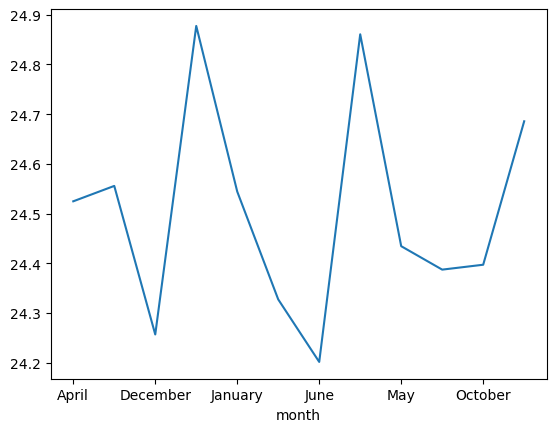

In [35]:
train.groupby('month')['avg_temp'].mean().plot()


<AxesSubplot:xlabel='date'>

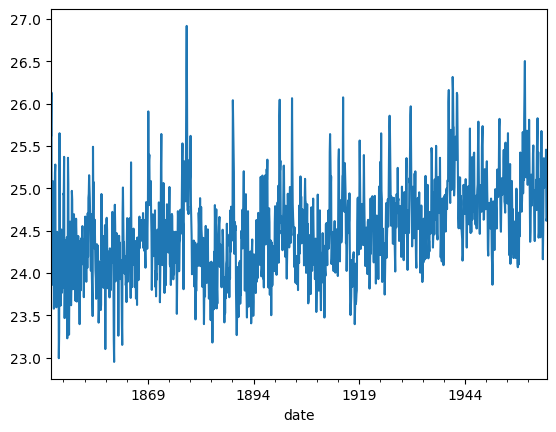

In [36]:
train['avg_temp'].resample('M').mean().plot()

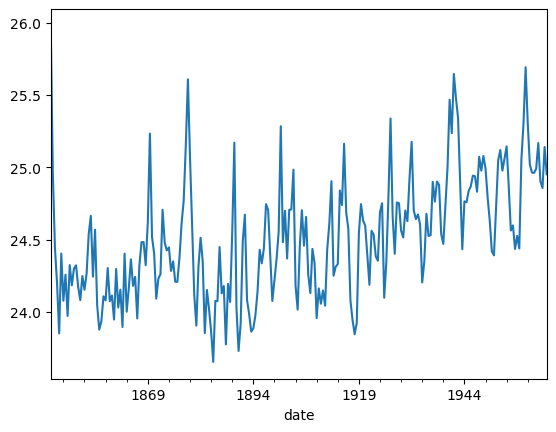

In [37]:
train['avg_temp'].resample('6M').mean().plot()

plt.show()

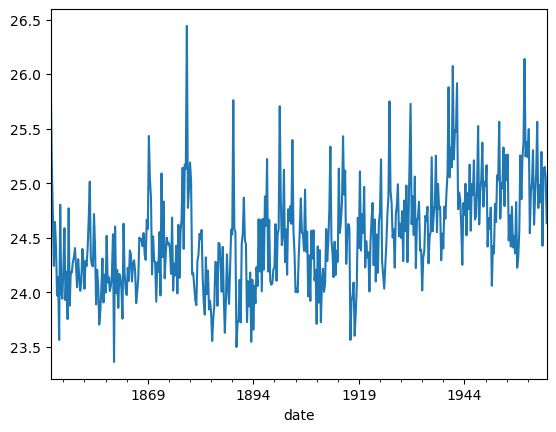

In [38]:
train['avg_temp'].resample('3M').mean().plot()
plt.show()

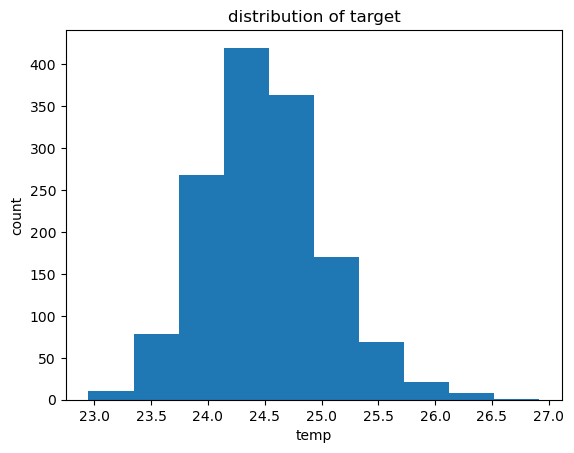

In [39]:
plt.hist(train['avg_temp'])
plt.xlabel('temp')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

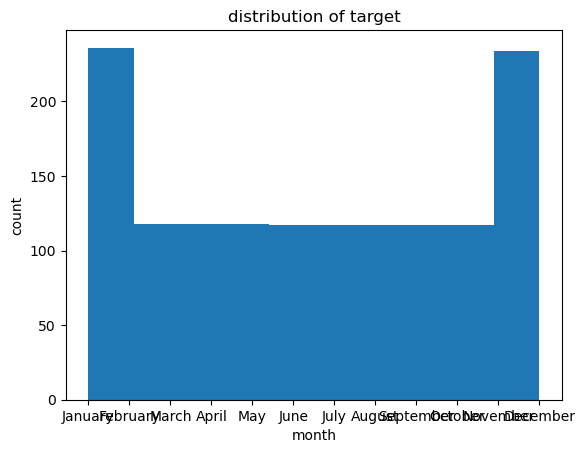

In [40]:
plt.hist(train['month'])
plt.xlabel('month')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

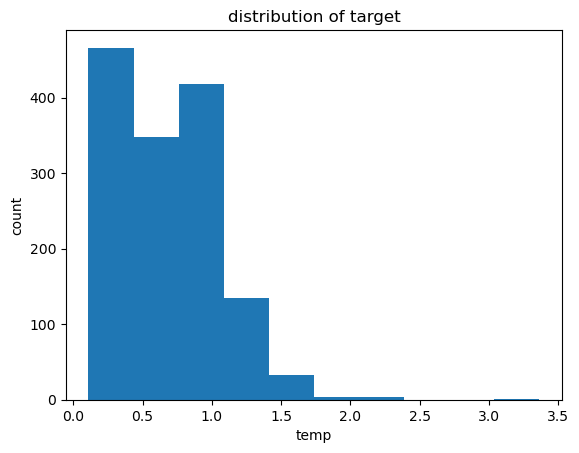

In [41]:
plt.hist(train['avg_temp_uncertainty'])
plt.xlabel('temp')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

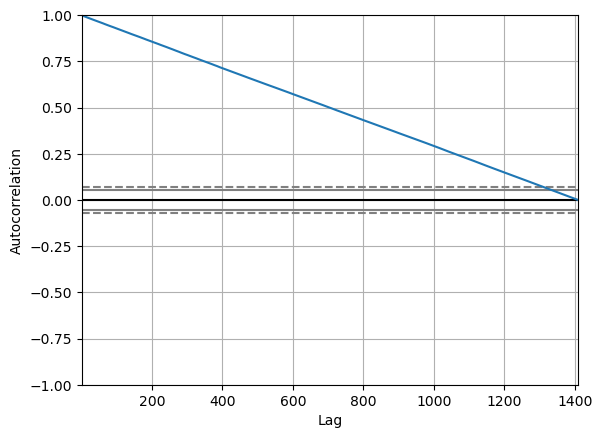

In [42]:
pd.plotting.autocorrelation_plot(train.resample('M').mean())

In [43]:
month_mean = train['avg_temp'].resample('M').mean()
month_mean = pd.DataFrame(month_mean)

month_mean['shifted'] = month_mean['avg_temp'].shift(-1)
month_mean

avg_temp  shifted
date                         
1846-01-31    25.977   25.614
1846-02-28    25.614   26.131
1846-03-31    26.131   23.857
1846-04-30    23.857   24.321
1846-05-31    24.321   24.749
1846-06-30    24.749   25.084
1846-07-31    25.084   24.838
1846-08-31    24.838   24.309
1846-09-30    24.309   23.577
1846-10-31    23.577   23.932
1846-11-30    23.932   24.817
1846-12-31    24.817   25.184
1847-01-31    25.184   25.280
1847-02-28    25.280   23.852
1847-03-31    23.852   24.139
1847-04-30    24.139   23.593
1847-05-31    23.593   23.832
1847-06-30    23.832   24.485
1847-07-31    24.485   24.336
1847-08-31    24.336   24.232
1847-09-30    24.232   23.848
1847-10-31    23.848   24.398
1847-11-30    24.398   22.992
1847-12-31    22.992   23.299
1848-01-31    23.299   25.650
1848-02-29    25.650   24.474
1848-03-31    24.474   24.281
1848-04-30    24.281   23.613
1848-05-31    23.613   23.888
1848-06-30    23.888   24.513
1848-07-31    24.513   24.045
1848-08-31    24.045   23.766
1848-09-30    23.766   24.011
1848-10-31    24.011   23.882
1848-11-30    23.882   23.823
1848-12-31    23.823   24.937
1849-01-31    24.937   24.923
1849-02-28    24.923   25.371
1849-03-31    25.371   23.467
1849-04-30    23.467   23.467
1849-05-31    23.467   23.934
1849-06-30    23.934   24.382
1849-07-31    24.382   24.350
1849-08-31    24.350   23.894
1849-09-30    23.894   24.325
1849-10-31    24.325   24.422
1849-11-30    24.422   23.227
1849-12-31    23.227   23.614
1850-01-31    23.614   25.360
1850-02-28    25.360   25.053
1850-03-31    25.053   23.895
1850-04-30    23.895   23.270
1850-05-31    23.270   23.902
1850-06-30    23.902   24.461
1850-07-31    24.461   24.606
1850-08-31    24.606   24.324
1850-09-30    24.324   23.631
1850-10-31    23.631   23.618
1850-11-30    23.618   23.952
1850-12-31    23.952   24.969
1851-01-31    24.969   24.864
1851-02-28    24.864   24.162
1851-03-31    24.162   23.807
1851-04-30    23.807   24.242
1851-05-31    24.242   24.026
1851-06-30    24.026   24.693
1851-07-31    24.693   24.504
1851-08-31    24.504   24.385
1851-09-30    24.385   24.326
1851-10-31    24.326   23.671
1851-11-30    23.671   24.405
1851-12-31    24.405   24.640
1852-01-31    24.640   24.456
1852-02-29    24.456   23.661
1852-03-31    23.661   24.019
1852-04-30    24.019   24.358
1852-05-31    24.358   24.116
1852-06-30    24.116   24.436
1852-07-31    24.436   24.236
1852-08-31    24.236   24.344
1852-09-30    24.344   23.866
1852-10-31    23.866   23.394
1852-11-30    23.394   24.269
1852-12-31    24.269   24.377
1853-01-31    24.377   23.793
1853-02-28    23.793   24.407
1853-03-31    24.407   24.095
1853-04-30    24.095   24.191
1853-05-31    24.191   24.447
1853-06-30    24.447   24.553
1853-07-31    24.553   24.418
1853-08-31    24.418   24.256
1853-09-30    24.256   24.148
1853-10-31    24.148   23.713
1853-11-30    23.713   24.399
1853-12-31    24.399   23.983
1854-01-31    23.983   24.075
1854-02-28    24.075   24.665
1854-03-31    24.665   24.121
1854-04-30    24.121   24.258
1854-05-31    24.258   23.895
1854-06-30    23.895   24.574
1854-07-31    24.574   24.453
1854-08-31    24.453   24.059
1854-09-30    24.059   24.705
1854-10-31    24.705   24.191
1854-11-30    24.191   24.887
1854-12-31    24.887   24.934
1855-01-31    24.934   25.154
1855-02-28    25.154   25.013
1855-03-31    25.013   24.875
1855-04-30    24.875   24.647
1855-05-31    24.647   24.270
1855-06-30    24.270   24.026
1855-07-31    24.026   24.696
1855-08-31    24.696   24.141
1855-09-30    24.141   23.917
1855-10-31    23.917   23.729
1855-11-30    23.729   23.490
1855-12-31    23.490   25.490
1856-01-31    25.490   24.753
1856-02-29    24.753   25.072
1856-03-31    25.072   24.326
1856-04-30    24.326   24.289
1856-05-31    24.289   24.628
1856-06-30    24.628   24.342
1856-07-31    24.342   24.031
1856-08-31    24.031   23.940
1856-09-30    23.940   23.694
1856-10-31    23.694   23.980
1856-11-30    23.980   24.339
1856-12-31    24.339  

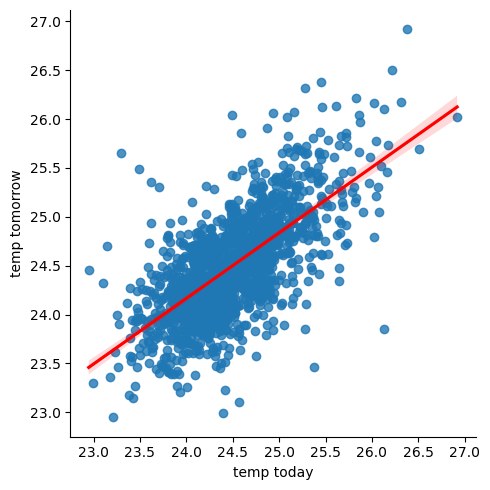

In [44]:
sns.lmplot(data = month_mean, x = 'avg_temp', y = 'shifted', line_kws= {'color': 'red'})
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')
plt.show()

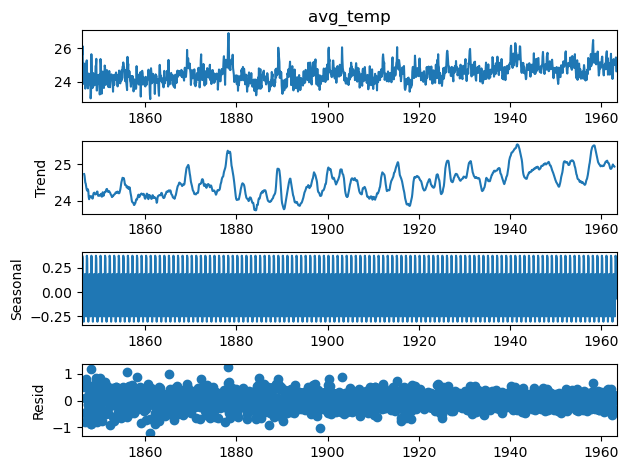

In [45]:
result = sm.tsa.seasonal_decompose(train['avg_temp'].resample('M').mean())

result.plot()
plt.show()

## Modeling

In [46]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 7)
    return rmse

In [47]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1, color='#377eb8')
    plt.plot(validate[target_var], label='Validate', linewidth=1, color='#ff7f00')
    plt.plot(yhat_df[target_var], label='yhat', linewidth=2, color='#a65628')
    plt.legend()
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [48]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

Empty DataFrame
Columns: [model_type, target_var, rmse]
Index: []

In [49]:
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [50]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

In [51]:
last_temp = train['avg_temp'][-1:][0]
last_temp

24.633000000000006

In [52]:
yhat_df = pd.DataFrame(
    {'avg_temp': last_temp},
    index=validate.index)

yhat_df.head()

avg_temp
date                
1963-06-30    24.633
1963-07-31    24.633
1963-08-31    24.633
1963-09-30    24.633
1963-10-31    24.633

avg_temp -- RMSE: 1


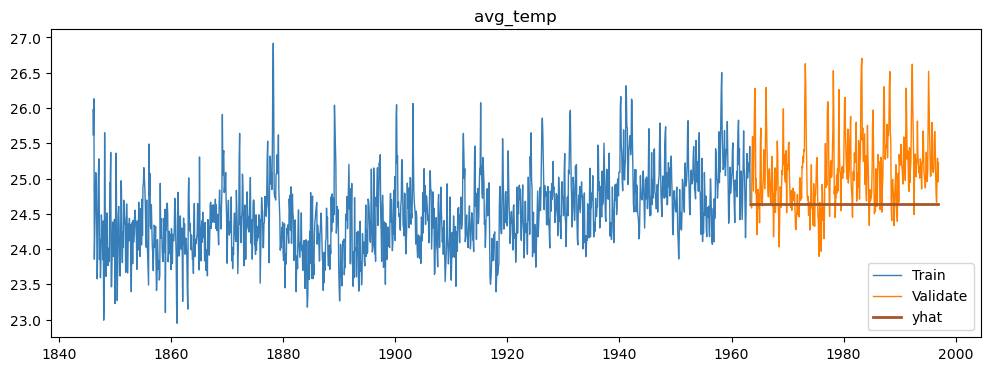

In [53]:
for col in train.columns:
    plot_and_eval(col)

In [54]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.688604

In [55]:
avg_temp = round(train.mean(), 2)[0]
avg_temp

24.51

In [56]:
def make_baseline_predictions(temp_predictions=None):
    yhat_df = pd.DataFrame({'avg_temp': temp_predictions},
                          index=validate.index)
    return yhat_df

In [57]:
yhat_df = make_baseline_predictions(avg_temp)

avg_temp -- RMSE: 1


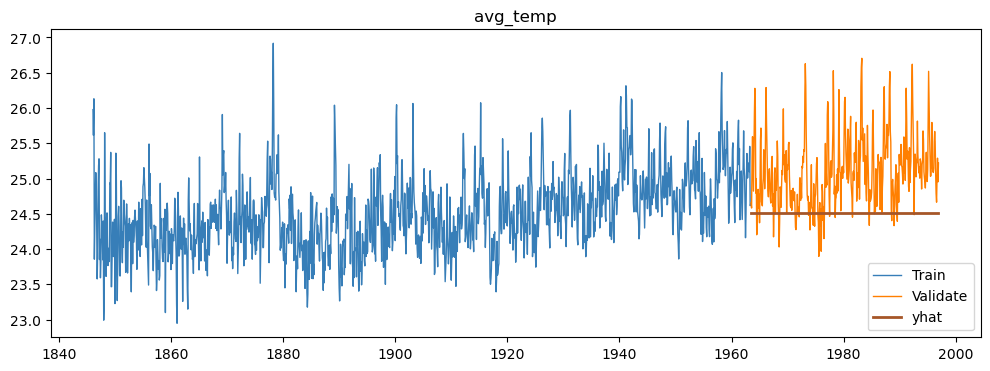

In [58]:
for col in train.columns:
    plot_and_eval(col)

In [59]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.688604
1       simple_average   avg_temp  0.778604

In [60]:
period=9
train['avg_temp'].rolling(period).mean()

date
1846-01-31          NaN
1846-02-28          NaN
1846-03-31          NaN
1846-04-30          NaN
1846-05-31          NaN
1846-06-30          NaN
1846-07-31          NaN
1846-08-31          NaN
1846-09-30    24.986667
1846-10-31    24.720000
1846-11-30    24.533111
1846-12-31    24.387111
1847-01-31    24.534556
1847-02-28    24.641111
1847-03-31    24.541444
1847-04-30    24.436444
1847-05-31    24.298111
1847-06-30    24.245111
1847-07-31    24.346000
1847-08-31    24.390889
1847-09-30    24.325889
1847-10-31    24.177444
1847-11-30    24.079444
1847-12-31    23.983889
1848-01-31    23.890556
1848-02-29    24.119111
1848-03-31    24.190444
1848-04-30    24.167778
1848-05-31    24.087444
1848-06-30    24.049222
1848-07-31    24.123111
1848-08-31    24.083889
1848-09-30    24.169889
1848-10-31    24.249000
1848-11-30    24.052556
1848-12-31    23.980222
1849-01-31    24.053111
1849-02-28    24.198667
1849-03-31    24.363444
1849-04-30    24.247222
1849-05-31    24.183000
1849-06-30 

In [61]:
train['avg_temp'].rolling(period).mean()[-1]

25.06822222222222

In [62]:
rolling_amount = round(train['avg_temp'].rolling(period).mean()[-1], 3)

print(rolling_amount)

25.068


In [63]:
yhat_df = make_baseline_predictions(rolling_amount)
yhat_df.head()

avg_temp
date                
1963-06-30    25.068
1963-07-31    25.068
1963-08-31    25.068
1963-09-30    25.068
1963-10-31    25.068

avg_temp -- RMSE: 0


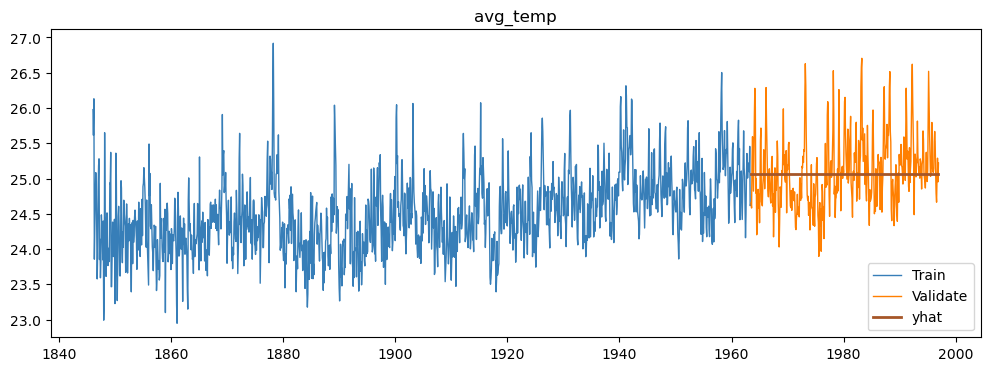

In [64]:
for col in train.columns:
    plot_and_eval(col)

In [65]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '1Q_moving_avg', 
                            target_var = col)

eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.688604
1       simple_average   avg_temp  0.778604
2        1Q_moving_avg   avg_temp  0.499906

In [66]:
periods = [1, 2, 6, 9, 12]

for p in periods: 
    rolling_amount = round(train['avg_temp'].rolling(p).mean()[-1], 3)
    
    yhat_df = make_baseline_predictions(rolling_amount)
    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

In [67]:
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.688604
1       simple_average   avg_temp  0.778604
2        1Q_moving_avg   avg_temp  0.499906
3   1_month_moving_avg   avg_temp  0.688604
4   2_month_moving_avg   avg_temp  0.694150
5   6_month_moving_avg   avg_temp  0.502938
6   9_month_moving_avg   avg_temp  0.499906
7  12_month_moving_avg   avg_temp  0.525611

In [68]:
best_amount_rmse = eval_df[eval_df.target_var == 'avg_temp']['rmse'].min()
best_amount_rmse

0.4999065

In [69]:
eval_df[eval_df.rmse == best_amount_rmse]

model_type target_var      rmse
2       1Q_moving_avg   avg_temp  0.499906
6  9_month_moving_avg   avg_temp  0.499906

## Holts Linear

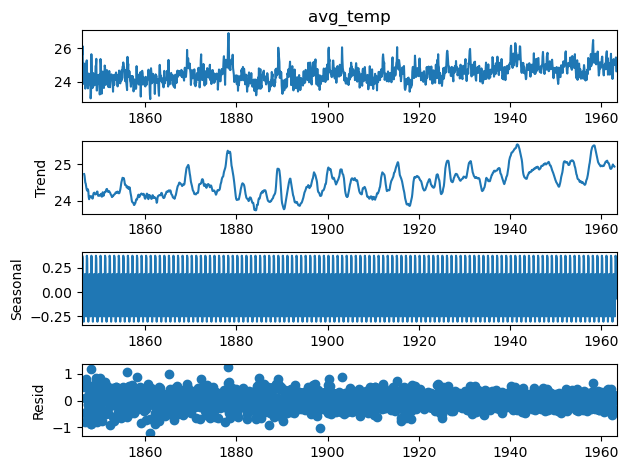

In [70]:
for col in train.columns:
    sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
    plt.show()

In [71]:
model = Holt(train['avg_temp'], exponential=False, damped=True)
model = model.fit(optimized=True)

In [72]:
yhat_amount = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [73]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [74]:
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.688604
1       simple_average   avg_temp  0.778604
2        1Q_moving_avg   avg_temp  0.499906
3   1_month_moving_avg   avg_temp  0.688604
4   2_month_moving_avg   avg_temp  0.694150
5   6_month_moving_avg   avg_temp  0.502938
6   9_month_moving_avg   avg_temp  0.499906
7  12_month_moving_avg   avg_temp  0.525611
8      holts_optimized   avg_temp  0.525611

In [75]:
hst_temp_fit1 = ExponentialSmoothing(train.avg_temp, seasonal_periods=60, trend='add', seasonal='add').fit()
hst_temp_fit2 = ExponentialSmoothing(train.avg_temp, seasonal_periods=60, trend='add', seasonal='mul').fit()
hst_temp_fit3 = ExponentialSmoothing(train.avg_temp, seasonal_periods=60, trend='add', seasonal='add', damped=True).fit()
hst_temp_fit4 = ExponentialSmoothing(train.avg_temp, seasonal_periods=60, trend='add', seasonal='mul', damped=True).fit()


In [76]:
results_amount=pd.DataFrame({'model':['hst_temp_fit1', 'hst_temp_fit2', 'hst_temp_fit3', 'hst_temp_fit4'],
                              'SSE':[hst_temp_fit1.sse, hst_temp_fit2.sse, hst_temp_fit3.sse, hst_temp_fit4.sse]})
results_amount

model         SSE
0  hst_temp_fit1  166.038780
1  hst_temp_fit2  165.232065
2  hst_temp_fit3  164.885706
3  hst_temp_fit4  164.065200

In [77]:
results_amount.sort_values(by='SSE')

model         SSE
3  hst_temp_fit4  164.065200
2  hst_temp_fit3  164.885706
1  hst_temp_fit2  165.232065
0  hst_temp_fit1  166.038780

In [78]:
yhat_df = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0])},
                          index=validate.index)
yhat_df

avg_temp
date                 
1963-06-30  24.538876
1963-07-31  24.682250
1963-08-31  24.818923
1963-09-30  24.990287
1963-10-31  24.692583
1963-11-30  24.673818
1963-12-31  24.546014
1964-01-31  24.899263
1964-02-29  25.235428
1964-03-31  25.162271
1964-04-30  24.840434
1964-05-31  24.772187
1964-06-30  24.473962
1964-07-31  24.563017
1964-08-31  24.845121
1964-09-30  24.967306
1964-10-31  24.716385
1964-11-30  24.780039
1964-12-31  24.528580
1965-01-31  24.724046
1965-02-28  25.139384
1965-03-31  25.185814
1965-04-30  24.773480
1965-05-31  24.719999
1965-06-30  24.558583
1965-07-31  24.606280
1965-08-31  24.882725
1965-09-30  24.957560
1965-10-31  24.679943
1965-11-30  24.645459
1965-12-31  24.552431
1966-01-31  24.851945
1966-02-28  25.204042
1966-03-31  25.282707
1966-04-30  24.916955
1966-05-31  24.869119
1966-06-30  24.574054
1966-07-31  24.752430
1966-08-31  24.954952
1966-09-30  25.055384
1966-10-31  24.741581
1966-11-30  24.728362
1966-12-31  24.710023
1967-01-31  24.910692
1967-02-28  25.202754
1967-03-31  25.185902
1967-04-30  24.883304
1967-05-31  24.713340
1967-06-30  24.446285
1967-07-31  24.620135
1967-08-31  24.887601
1967-09-30  25.080230
1967-10-31  24.763603
1967-11-30  24.720084
1967-12-31  24.547494
1968-01-31  24.899269
1968-02-29  25.213572
1968-03-31  25.114611
1968-04-30  24.804696
1968-05-31  24.689016
1968-06-30  24.538876
1968-07-31  24.682250
1968-08-31  24.818923
1968-09-30  24.990287
1968-10-31  24.692583
1968-11-30  24.673818
1968-12-31  24.546014
1969-01-31  24.899263
1969-02-28  25.235428
1969-03-31  25.162271
1969-04-30  24.840434
1969-05-31  24.772187
1969-06-30  24.473962
1969-07-31  24.563017
1969-08-31  24.845121
1969-09-30  24.967306
1969-10-31  24.716385
1969-11-30  24.780039
1969-12-31  24.528580
1970-01-31  24.724046
1970-02-28  25.139384
1970-03-31  25.185814
1970-04-30  24.773480
1970-05-31  24.719999
1970-06-30  24.558583
1970-07-31  24.606280
1970-08-31  24.882725
1970-09-30  24.957560
1970-10-31  24.679943
1970-11-30  24.645459
1970-12-31  24.552431
1971-01-31  24.851945
1971-02-28  25.204042
1971-03-31  25.282707
1971-04-30  24.916955
1971-05-31  24.869119
1971-06-30  24.574054
1971-07-31  24.752430
1971-08-31  24.954952
1971-09-30  25.055384
1971-10-31  24.741581
1971-11-30  24.728362
1971-12-31  24.710023
1972-01-31  24.910692
1972-02-29  25.202754
1972-03-31  25.185902
1972-04-30  24.883304
1972-05-31  24.713340
1972-06-30  24.446285
1972-07-31  24.620135
1972-08-31  24.887601
1972-09-30  25.080230
1972-10-31  24.763603
1972-11-30  24.720084
1972-12-31  24.547494
1973-01-31  24.899269
1973-02-28  25.213572
1973-03-31  25.114611
1973-04-30  24.804696
1973-05-31  24.689016
1973-06-30  24.538876
1973-07-31  24.682250
1973-08-31  24.818923
1973-09-30  24.990287
1973-10-31  24.692583
1973-11-30  24.673818
1973-12-31  24.546014
1974-01-31  24.899263
1974-02-28  25.235428
1974-03-31  25.162271
1974-04-30  24.840434
1974-05-31  24.772187
1974-06-30  24.473962
1974-07-31  24.563017
1974-08-31  24.845121
1974-09-30  24.967306
1974-10-31  24.716385
1974-11-30  24.780039
1974-12-31  24.528580
1975-01-31  24.724046
1975-02-28  25.139384
1975-03-31  25.185814
1975-04-30  24.773480
1975-05-31  24.719999
1975-06-30  24.558583
1975-07-31  24.606280
1975-08-31  24.882725
1975-09-30  24.957560
1975-10-31  24.679943
1975-11-30  24.645459
1975-12-31  24.552431
1976-01-31  24.851945
1976-02-29  25.204042
1976-03-31  25.282707
1976-04-30  24.916955
1976-05-31  24.869119
1976-06-30  24.574054
1976-07-31  24.752430
1976-08-31  24.954952
1976-09-30  25.055384
1976-10-31  24.741581
1976-11-30  24.728362
1976-12-31  24.710023
1977-01-31  24.910692
1977-02-28  25.202754
1977-03-31  25.185902
1977-04-30  24.883304
1977-05-31  24.713340
1977-06-30  24.446285
1977-07-31  24.620135
1977-08-31  24.887601
1977-09-30  25.080230
1977-10-31  24.763603
1977-11-30  24.720084
1977-12-31  24.547494
1978-01-31  24.899269
1978-02-28  25.213572
1978-03-31  25.114611
1978-04-30  24.804696
1978-05-31  24.689016
1978-06-3

In [79]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

avg_temp -- RMSE: 1


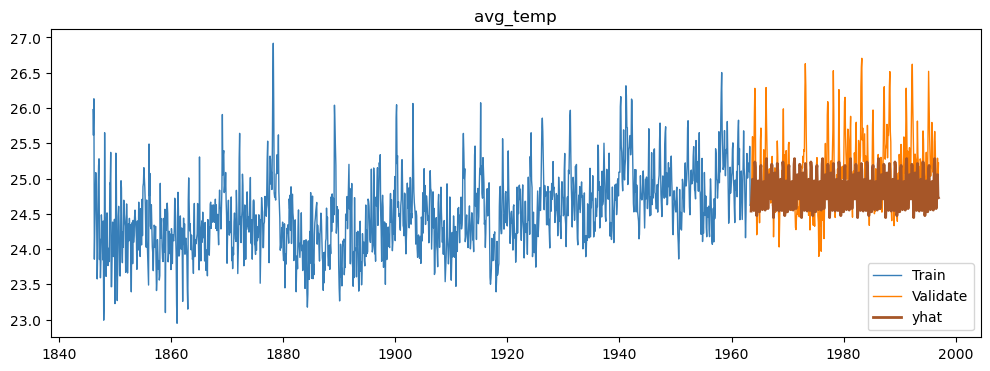

In [80]:
for col in train.columns:
    plot_and_eval(col)

In [81]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_seasonal_add_mul', 
                            target_var = col)

In [82]:
eval_df.sort_values('rmse')

model_type target_var      rmse
2           1Q_moving_avg   avg_temp  0.499906
6      9_month_moving_avg   avg_temp  0.499906
5      6_month_moving_avg   avg_temp  0.502938
9  holts_seasonal_add_mul   avg_temp  0.504957
7     12_month_moving_avg   avg_temp  0.525611
8         holts_optimized   avg_temp  0.525611
0     last_observed_value   avg_temp  0.688604
3      1_month_moving_avg   avg_temp  0.688604
4      2_month_moving_avg   avg_temp  0.694150
1          simple_average   avg_temp  0.778604

In [83]:
train = colombia_resampled[:train_size]
validate = colombia_resampled[train_size:validate_end_index]
test = colombia_resampled[validate_end_index:]

In [84]:
train.shape, validate.shape, test.shape

((1409, 2), (402, 2), (201, 2))

In [85]:
'''# Specify the number of periods to include in the moving average
n = 9

# Create a new column to store the moving average
train['moving_avg'] = train['avg_temp'].rolling(window=n).mean()

# Use the moving average to make predictions
forecast = train['moving_avg'].shift(1)
train['forecast'] = forecast

# Print the resulting dataframe
print(train)'''

"# Specify the number of periods to include in the moving average\nn = 9\n\n# Create a new column to store the moving average\ntrain['moving_avg'] = train['avg_temp'].rolling(window=n).mean()\n\n# Use the moving average to make predictions\nforecast = train['moving_avg'].shift(1)\ntrain['forecast'] = forecast\n\n# Print the resulting dataframe\nprint(train)"

In [86]:
yhat_df = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0] + test.shape[0])})
yhat_df

avg_temp
1963-06-30  24.538876
1963-07-31  24.682250
1963-08-31  24.818923
1963-09-30  24.990287
1963-10-31  24.692583
1963-11-30  24.673818
1963-12-31  24.546014
1964-01-31  24.899263
1964-02-29  25.235428
1964-03-31  25.162271
1964-04-30  24.840434
1964-05-31  24.772187
1964-06-30  24.473962
1964-07-31  24.563017
1964-08-31  24.845121
1964-09-30  24.967306
1964-10-31  24.716385
1964-11-30  24.780039
1964-12-31  24.528580
1965-01-31  24.724046
1965-02-28  25.139384
1965-03-31  25.185814
1965-04-30  24.773480
1965-05-31  24.719999
1965-06-30  24.558583
1965-07-31  24.606280
1965-08-31  24.882725
1965-09-30  24.957560
1965-10-31  24.679943
1965-11-30  24.645459
1965-12-31  24.552431
1966-01-31  24.851945
1966-02-28  25.204042
1966-03-31  25.282707
1966-04-30  24.916955
1966-05-31  24.869119
1966-06-30  24.574054
1966-07-31  24.752430
1966-08-31  24.954952
1966-09-30  25.055384
1966-10-31  24.741581
1966-11-30  24.728362
1966-12-31  24.710023
1967-01-31  24.910692
1967-02-28  25.202754
1967-03-31  25.185902
1967-04-30  24.883304
1967-05-31  24.713340
1967-06-30  24.446285
1967-07-31  24.620135
1967-08-31  24.887601
1967-09-30  25.080230
1967-10-31  24.763603
1967-11-30  24.720084
1967-12-31  24.547494
1968-01-31  24.899269
1968-02-29  25.213572
1968-03-31  25.114611
1968-04-30  24.804696
1968-05-31  24.689016
1968-06-30  24.538876
1968-07-31  24.682250
1968-08-31  24.818923
1968-09-30  24.990287
1968-10-31  24.692583
1968-11-30  24.673818
1968-12-31  24.546014
1969-01-31  24.899263
1969-02-28  25.235428
1969-03-31  25.162271
1969-04-30  24.840434
1969-05-31  24.772187
1969-06-30  24.473962
1969-07-31  24.563017
1969-08-31  24.845121
1969-09-30  24.967306
1969-10-31  24.716385
1969-11-30  24.780039
1969-12-31  24.528580
1970-01-31  24.724046
1970-02-28  25.139384
1970-03-31  25.185814
1970-04-30  24.773480
1970-05-31  24.719999
1970-06-30  24.558583
1970-07-31  24.606280
1970-08-31  24.882725
1970-09-30  24.957560
1970-10-31  24.679943
1970-11-30  24.645459
1970-12-31  24.552431
1971-01-31  24.851945
1971-02-28  25.204042
1971-03-31  25.282707
1971-04-30  24.916955
1971-05-31  24.869119
1971-06-30  24.574054
1971-07-31  24.752430
1971-08-31  24.954952
1971-09-30  25.055384
1971-10-31  24.741581
1971-11-30  24.728362
1971-12-31  24.710023
1972-01-31  24.910692
1972-02-29  25.202754
1972-03-31  25.185902
1972-04-30  24.883304
1972-05-31  24.713340
1972-06-30  24.446285
1972-07-31  24.620135
1972-08-31  24.887601
1972-09-30  25.080230
1972-10-31  24.763603
1972-11-30  24.720084
1972-12-31  24.547494
1973-01-31  24.899269
1973-02-28  25.213572
1973-03-31  25.114611
1973-04-30  24.804696
1973-05-31  24.689016
1973-06-30  24.538876
1973-07-31  24.682250
1973-08-31  24.818923
1973-09-30  24.990287
1973-10-31  24.692583
1973-11-30  24.673818
1973-12-31  24.546014
1974-01-31  24.899263
1974-02-28  25.235428
1974-03-31  25.162271
1974-04-30  24.840434
1974-05-31  24.772187
1974-06-30  24.473962
1974-07-31  24.563017
1974-08-31  24.845121
1974-09-30  24.967306
1974-10-31  24.716385
1974-11-30  24.780039
1974-12-31  24.528580
1975-01-31  24.724046
1975-02-28  25.139384
1975-03-31  25.185814
1975-04-30  24.773480
1975-05-31  24.719999
1975-06-30  24.558583
1975-07-31  24.606280
1975-08-31  24.882725
1975-09-30  24.957560
1975-10-31  24.679943
1975-11-30  24.645459
1975-12-31  24.552431
1976-01-31  24.851945
1976-02-29  25.204042
1976-03-31  25.282707
1976-04-30  24.916955
1976-05-31  24.869119
1976-06-30  24.574054
1976-07-31  24.752430
1976-08-31  24.954952
1976-09-30  25.055384
1976-10-31  24.741581
1976-11-30  24.728362
1976-12-31  24.710023
1977-01-31  24.910692
1977-02-28  25.202754
1977-03-31  25.185902
1977-04-30  24.883304
1977-05-31  24.713340
1977-06-30  24.446285
1977-07-31  24.620135
1977-08-31  24.887601
1977-09-30  25.080230
1977-10-31  24.763603
1977-11-30  24.720084
1977-12-31  24.547494
1978-01-31  24.899269
1978-02-28  25.213572
1978-03-31  25.114611
1978-04-30  24.804696
1978-05-31  24.689016
1978-06-30  24.538876
1978-07-3

In [87]:
validate.head(1)

avg_temp  avg_temp_uncertainty
date                                      
1963-06-30    24.657                 0.265

In [88]:
test.head(1)

avg_temp  avg_temp_uncertainty
date                                      
1996-12-31    24.923                 0.099

In [89]:
yhat_df = yhat_df['1996-12-31':]

In [90]:
yhat_df.shape, test.shape

((201, 1), (201, 2))

In [91]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(validate[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(target_var)
    plt.show()

In [92]:
rmse_amount = sqrt(mean_squared_error(test['avg_temp'], 
                                       yhat_df['avg_temp']))

In [93]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

In [94]:
test = test.iloc[:,0]
test = pd.DataFrame(test)

In [95]:
rmse_amount

0.7622679422244562

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-amount:  0.7622679422244562


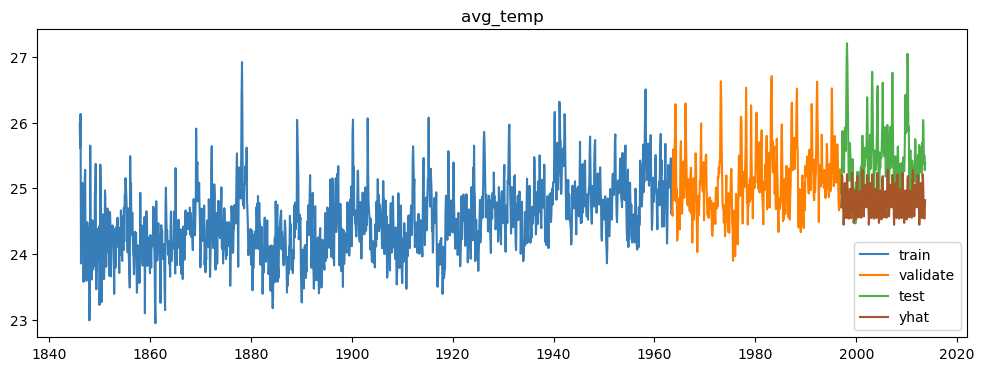

In [96]:
print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
print('rmse-amount: ', rmse_amount)
for col in train.columns:
    final_plot(col)

In [97]:
eval_df

model_type target_var      rmse
0     last_observed_value   avg_temp  0.688604
1          simple_average   avg_temp  0.778604
2           1Q_moving_avg   avg_temp  0.499906
3      1_month_moving_avg   avg_temp  0.688604
4      2_month_moving_avg   avg_temp  0.694150
5      6_month_moving_avg   avg_temp  0.502938
6      9_month_moving_avg   avg_temp  0.499906
7     12_month_moving_avg   avg_temp  0.525611
8         holts_optimized   avg_temp  0.525611
9  holts_seasonal_add_mul   avg_temp  0.504957

In [98]:
forecast = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0] + test.shape[0] + 60)})
forecast = forecast['2013-08-31':]
forecast

avg_temp
2013-08-31  24.818923
2013-09-30  24.990287
2013-10-31  24.692583
2013-11-30  24.673818
2013-12-31  24.546014
2014-01-31  24.899263
2014-02-28  25.235428
2014-03-31  25.162271
2014-04-30  24.840434
2014-05-31  24.772187
2014-06-30  24.473962
2014-07-31  24.563017
2014-08-31  24.845121
2014-09-30  24.967306
2014-10-31  24.716385
2014-11-30  24.780039
2014-12-31  24.528580
2015-01-31  24.724046
2015-02-28  25.139384
2015-03-31  25.185814
2015-04-30  24.773480
2015-05-31  24.719999
2015-06-30  24.558583
2015-07-31  24.606280
2015-08-31  24.882725
2015-09-30  24.957560
2015-10-31  24.679943
2015-11-30  24.645459
2015-12-31  24.552431
2016-01-31  24.851945
2016-02-29  25.204042
2016-03-31  25.282707
2016-04-30  24.916955
2016-05-31  24.869119
2016-06-30  24.574054
2016-07-31  24.752430
2016-08-31  24.954952
2016-09-30  25.055384
2016-10-31  24.741581
2016-11-30  24.728362
2016-12-31  24.710023
2017-01-31  24.910692
2017-02-28  25.202754
2017-03-31  25.185902
2017-04-30  24.883304
2017-05-31  24.713340
2017-06-30  24.446285
2017-07-31  24.620135
2017-08-31  24.887601
2017-09-30  25.080230
2017-10-31  24.763603
2017-11-30  24.720084
2017-12-31  24.547494
2018-01-31  24.899269
2018-02-28  25.213572
2018-03-31  25.114611
2018-04-30  24.804696
2018-05-31  24.689016
2018-06-30  24.538876
2018-07-31  24.682250
2018-08-31  24.818923

In [99]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(validate[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(forecast[target_var], color='#984ea3', label='Forecast')
    plt.title(target_var)
    plt.legend()
    plt.show()

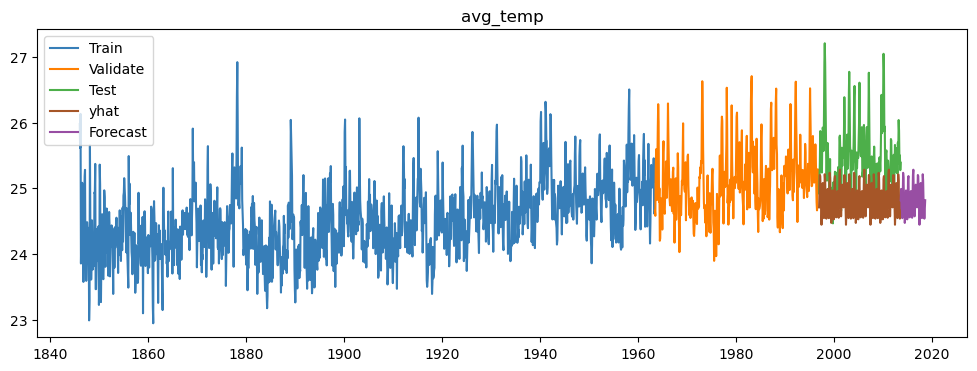

In [100]:
for col in train.columns:
    final_plot(col)